In [1]:
import pandas as pd
import re

# Read the list of filenames from the configuration file
with open('file_list.txt', 'r', encoding='utf-8') as config_file:
    file_names = config_file.read().splitlines()

# Regex pattern to match the data format
pattern = r'\[(.*?)\] (.*?): (.*)'


# Initialize an empty list to store parsed data
datalist = []
stream_count = 0
# Iterate over each specified file
for file in file_names:
    full_path = file
    with open(full_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
        for line in lines:
            match = re.match(pattern, line)
            if match:
                date, user, message = match.groups()
                datalist.append([date, user, message,stream_count])
    stream_count = stream_count + 1

# Create a DataFrame from the parsed data
data = pd.DataFrame(datalist, columns=["date", "user", "message","stream"])

data['date'] = pd.to_datetime(data['date'])

data = data.sort_values(by=['user', 'date'])

#data2 = data[data['user'] == '1206paul_']
#data2 = data[data['user'] == 'balintboss']
#data2 = data[data['user'] == 'klimzaa']
#data2 = data[data['user'] == 'gkey']
#data2 = data[data['user'] == 'Martin_Gales']
data2 = data[data['user'] == 'IvanOnMyOwn']
#data2 = data[data['user'] == 'Trizze']





# Calculate the total number of messages per stream
total_messages_per_stream = data2['stream'].value_counts()

# Combine the results into a single DataFrame
stream_stats = pd.DataFrame({
    'total_messages': total_messages_per_stream
})

# Calculate the time difference between the first and last messages for each stream
watch_lengths = data2.groupby('stream')['date'].agg(lambda x: (x.max() - x.min()).total_seconds())

# Add the stream_length column to the stream_stats DataFrame
stream_stats['watch_length'] = watch_lengths

# Calculate the time difference between the first and last messages for each stream
stream_lengths = data.groupby('stream')['date'].agg(lambda x: (x.max() - x.min()).total_seconds())

# Add the stream_length column to the stream_stats DataFrame
stream_stats['stream_length'] = stream_lengths

stream_stats.head(10)

,total_messages,watch_length,stream_length
stream,,,
61,239,11159.0,11766.0
5,232,16431.0,20382.0
9,215,13119.0,16418.0
43,214,17692.0,20792.0
48,202,24801.0,25912.0
42,198,19847.0,21262.0
47,194,16300.0,17769.0
70,188,25860.0,26839.0
46,186,24087.0,24561.0


In [2]:
stream_stats.describe()

,total_messages,watch_length,stream_length
count,66.000000,66.000000,66.000000
mean,87.136364,14318.848485,18444.348485
std,64.050434,6752.986419,5484.100960
min,1.000000,0.000000,5257.000000
25%,38.250000,11206.500000,16465.500000
50%,74.000000,15520.000000,18364.000000
75%,123.250000,18715.750000,21205.500000
max,239.000000,28363.000000,36105.000000


In [3]:
stream_stats['watch_length_in_hour'] = stream_stats['watch_length'] / 60 /60
stream_stats['stream_length_in_hour'] = stream_stats['stream_length'] / 60 /60

stream_stats.head(5)

,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour
stream,,,,,
61,239,11159.0,11766.0,3.099722,3.268333
5,232,16431.0,20382.0,4.564167,5.661667
9,215,13119.0,16418.0,3.644167,4.560556
43,214,17692.0,20792.0,4.914444,5.775556
48,202,24801.0,25912.0,6.889167,7.197778


In [4]:
stream_stats['persenteg'] = stream_stats['watch_length'] / stream_stats['stream_length'] * 100

stream_stats.head(5)



,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour,persenteg
stream,,,,,,
61,239,11159.0,11766.0,3.099722,3.268333,94.841067
5,232,16431.0,20382.0,4.564167,5.661667,80.615249
9,215,13119.0,16418.0,3.644167,4.560556,79.906201
43,214,17692.0,20792.0,4.914444,5.775556,85.090419
48,202,24801.0,25912.0,6.889167,7.197778,95.712411


In [5]:
stream_stats['persenteg'].describe()

count    66.000000
mean     74.734851
std      26.536889
min       0.000000
25%      68.802106
50%      83.553162
75%      93.346871
max      98.608321
Name: persenteg, dtype: float64

In [6]:
stream_stats = stream_stats.sort_values(by='persenteg')

stream_stats.head(10)


,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour,persenteg
stream,,,,,,
22,1,0.0,12616.0,0.000000,3.504444,0.000000
69,3,69.0,18002.0,0.019167,5.000556,0.383291
50,2,22.0,5257.0,0.006111,1.460278,0.418490
18,7,189.0,7430.0,0.052500,2.063889,2.543742
36,33,1707.0,16433.0,0.474167,4.564722,10.387635
67,5,6155.0,23469.0,1.709722,6.519167,26.226085
35,87,9603.0,25150.0,2.667500,6.986111,38.182903
8,62,7753.0,18686.0,2.153611,5.190556,41.490956
14,88,6794.0,15055.0,1.887222,4.181944,45.127864


In [7]:
stream_stats['watch_length_in_hour'].sum() /24

10.93800925925926

In [8]:
stream_stats = stream_stats.reset_index()
stream_stats = stream_stats.sort_values(by='stream')

stream_stats.head(10)

,stream,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour,persenteg
53,0,37,16904.0,17697.0,4.695556,4.915833,95.519015
43,1,81,16172.0,17831.0,4.492222,4.953056,90.695979
40,2,71,17170.0,19147.0,4.769444,5.318611,89.674623
58,3,39,16752.0,17451.0,4.653333,4.847500,95.994499
27,4,71,15015.0,18734.0,4.170833,5.203889,80.148393
29,5,232,16431.0,20382.0,4.564167,5.661667,80.615249
57,6,127,15896.0,16563.0,4.415556,4.600833,95.972952
28,7,93,14256.0,17773.0,3.960000,4.936944,80.211557
7,8,62,7753.0,18686.0,2.153611,5.190556,41.490956
26,9,215,13119.0,16418.0,3.644167,4.560556,79.906201


In [9]:
stream_stats.tail(10)

,stream,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour,persenteg
50,59,50,16111.0,17242.0,4.475278,4.789444,93.440436
51,61,239,11159.0,11766.0,3.099722,3.268333,94.841067
35,62,52,15691.0,18477.0,4.358611,5.132500,84.921795
61,63,55,18107.0,18507.0,5.029722,5.140833,97.838656
18,64,21,13063.0,18293.0,3.628611,5.081389,71.409829
15,65,87,11816.0,18147.0,3.282222,5.040833,65.112691
5,67,5,6155.0,23469.0,1.709722,6.519167,26.226085
30,68,22,14931.0,18515.0,4.147500,5.143056,80.642722
1,69,3,69.0,18002.0,0.019167,5.000556,0.383291
59,70,188,25860.0,26839.0,7.183333,7.455278,96.352323


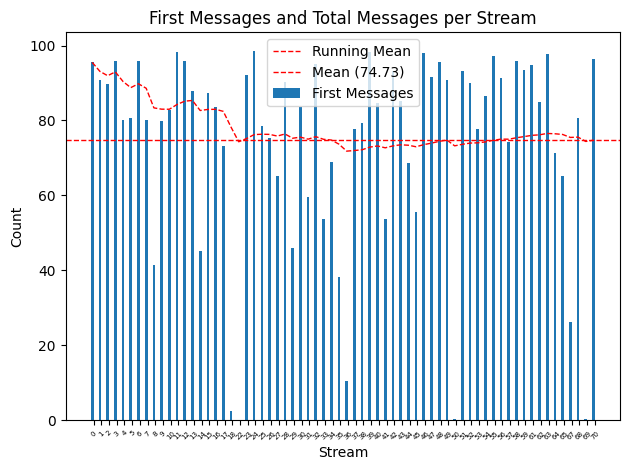

In [10]:
import matplotlib.pyplot as plt


# Plot the chart
fig, ax = plt.subplots()

# Bar width
bar_width = 0.35

# Bar positions
index = range(len(stream_stats))

# Bar plots
bar1 = ax.bar(index, stream_stats['persenteg'], bar_width, label='First Messages')

# Calculate mean of first messages
persenteg_messages = stream_stats['persenteg'].mean()

stream_stats['persenteg_avg'] = stream_stats['persenteg'].expanding().mean()

# Plot the running mean line
ax.plot(index, stream_stats['persenteg_avg'], color='r', linestyle='--', linewidth=1, label='Running Mean')

# Draw the mean line
ax.axhline(persenteg_messages, color='r', linestyle='--', linewidth=1, label=f'Mean ({persenteg_messages:.2f})')

# Labels and title
ax.set_xlabel('Stream', fontsize=10)
ax.set_ylabel('Count', fontsize=10)
ax.set_title('First Messages and Total Messages per Stream', fontsize=12)
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(stream_stats['stream'], fontsize=5)  # Adjust x-tick labels font size
ax.legend(fontsize=10)

# Display the plot
plt.xticks(rotation=45)  # Rotate x labels if necessary
plt.tight_layout()
plt.show()
